# Face Emotion Recognition v2

Yesterday I failed, but at least I learn something from yesterday

Okay, this day I will build the same model again but using KERAS follow this [repo](https://github.com/akmadan/Emotion_Detection_CNN)

The original dataset is [this](https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset)

## Import Modules

In [1]:
### LIBRARIES FOR THE DEEP LEARNING
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Model, Sequential
###

### COMMON LIBRARIES FOR DATA SCIENCE
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
import os
###

## Dataset

In [2]:
pict_size = 48 # Picture Size
dataset = 'data/'

## Example

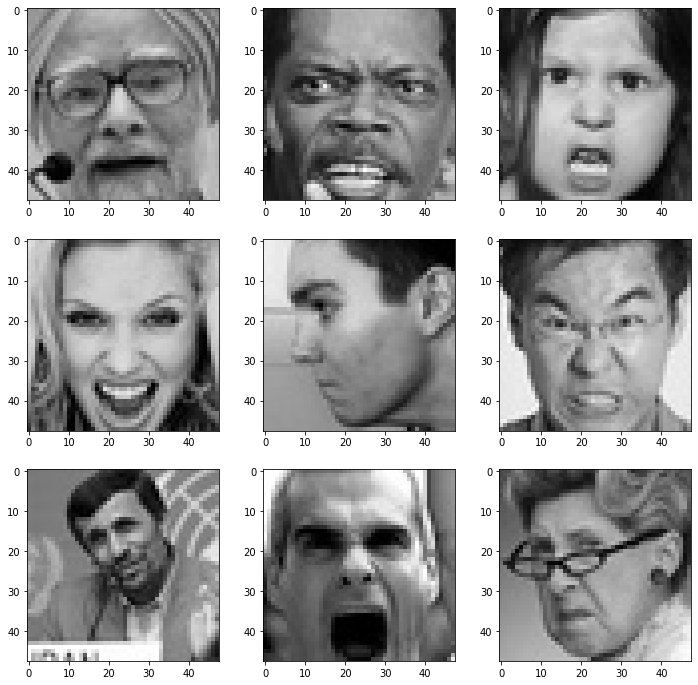

In [3]:
emotion = 'angry'

plt.figure(figsize=(12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(dataset+'train/'+emotion+'/'+
                   os.listdir(dataset + 'train/' + emotion)[i], 
                   target_size=(pict_size, pict_size))
    plt.imshow(img)
plt.show()

## Buld Data Train and Validation

In [4]:
batch_size = 128

data_train = ImageDataGenerator()
data_val = ImageDataGenerator()

train_set = data_train.flow_from_directory(dataset+'train',
                                           target_size=(pict_size, pict_size),
                                           color_mode='grayscale',
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           shuffle=True)

test_set = data_val.flow_from_directory(dataset+'validation',
                                        target_size=(pict_size, pict_size),
                                        color_mode='grayscale',
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=True)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Model Build

In [5]:
num_classes = 7
model = Sequential()

# 1st CNN Layer
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd CNN Layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3rd CNN Layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# #4th CNN Layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully Connected 2nd Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))

optimize = Adam(lr = 0.0001)
model.compile(optimizer=optimize, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

## Model Fitting

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('models.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

### CALLBACKS
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=3,
                           verbose=0.5,
                           restore_best_weights=True)

reduce_learning = ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.2,
                                    patience=3,
                                    verbose=0.5,
                                    min_delta=0.0001)

callback_stop = [early_stop, reduce_learning]

epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=test_set.n//test_set.batch_size,
                    callbacks=callback_stop)

Epoch 1/50
225/225 [==============================] - 1058s 5s/step - loss: 1.9320 - accuracy: 0.2739 - val_loss: 1.8567 - val_accuracy: 0.3321
Epoch 2/50
225/225 [==============================] - 660s 3s/step - loss: 1.4799 - accuracy: 0.4347 - val_loss: 1.7936 - val_accuracy: 0.4080
Epoch 3/50
225/225 [==============================] - 599s 3s/step - loss: 1.3142 - accuracy: 0.4952 - val_loss: 1.2798 - val_accuracy: 0.5186
Epoch 4/50
225/225 [==============================] - 592s 3s/step - loss: 1.2081 - accuracy: 0.5387 - val_loss: 1.1575 - val_accuracy: 0.5634
Epoch 5/50
225/225 [==============================] - 594s 3s/step - loss: 1.1304 - accuracy: 0.5710 - val_loss: 1.2834 - val_accuracy: 0.5030
Epoch 6/50
225/225 [==============================] - 595s 3s/step - loss: 1.0603 - accuracy: 0.6027 - val_loss: 1.1578 - val_accuracy: 0.5570
Epoch 7/50
225/225 [==============================] - 588s 3s/step - loss: 1.0236 - accuracy: 0.6129 - val_loss: 1.2518 - val_accuracy: 0.529

## Accuracy & Loss Plot

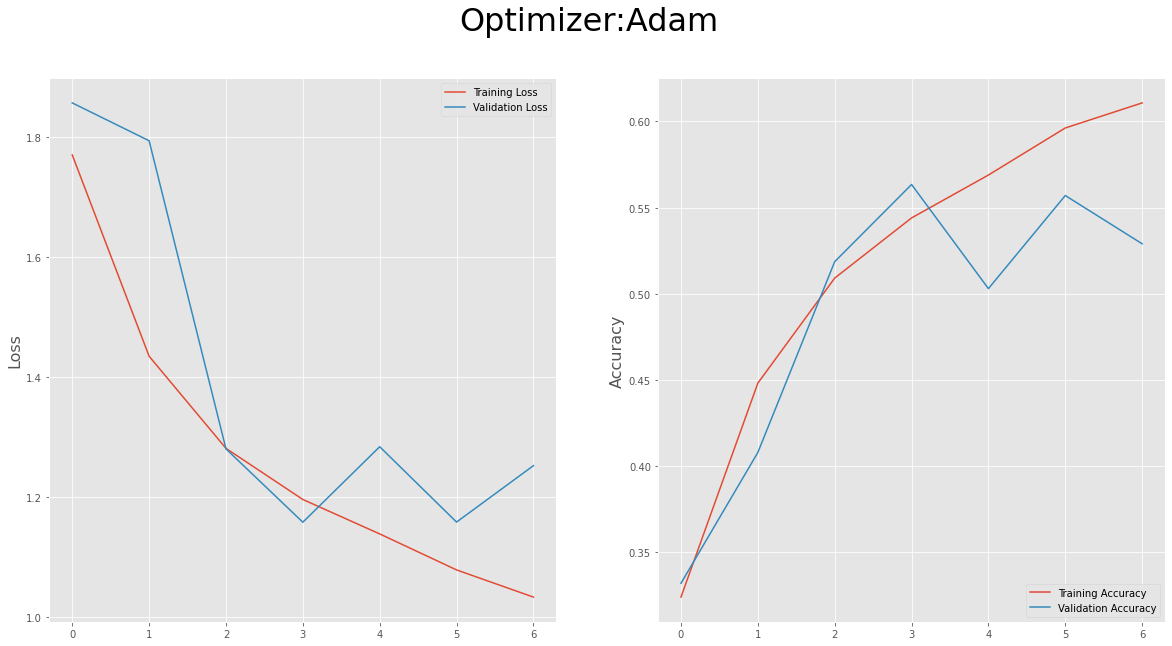

In [17]:
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer:Adam', fontsize =32)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

In [11]:
model.save('models.h5')